In [1]:
import torch
import numpy as np
from models.vit_lit import VitModel
import matplotlib.pyplot as plt
import glob,os

In [30]:
path = 'runs/ViT-minimum_rotate/version_1/checkpoints'
path = glob.glob(f'{path}/*') # * means all if need specific format then *.csv
file = max(path, key=os.path.getctime)
model = VitModel.load_from_checkpoint(file)
file

'runs/ViT-minimum_rotate/version_1/checkpoints/ViT-minimum_rotate-epoch=107-valid_loss=1.50e-02.ckpt'

In [31]:
def generate1():
    a = np.array([np.random.randn()+3,np.random.randn()+3, np.random.randn()-3,np.random.randn()-3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

def generate2():
    a = np.array([np.random.randn()+3,np.random.randn()-3, np.random.randn()-3,np.random.randn()+3])
    a = (a - np.min(a))/(np.max(a)-np.min(a))

    return np.array([np.array(a).reshape(2,2)])

data_num = 8
inputs = np.array([ generate1() for _ in range(data_num//4)] +
                    [np.rot90(generate1(), k=1, axes=(1,2)) for _ in range(data_num//4)] +
                    [np.rot90(generate1(), k=2, axes=(1,2)) for _ in range(data_num//4)] +
                    [np.rot90(generate1(), k=3, axes=(1,2)) for _ in range(data_num//4)] +

                    [ generate2() for _ in range(data_num//2)]+
                [np.rot90(generate2(), axes=(1,2)) for _ in range(data_num//2)])

outputs = np.array([ 0 for _ in range(data_num)] + [ 1 for _ in range(data_num)])




input = torch.tensor(inputs, dtype=torch.float32)
output = torch.tensor(outputs, dtype=torch.int64)

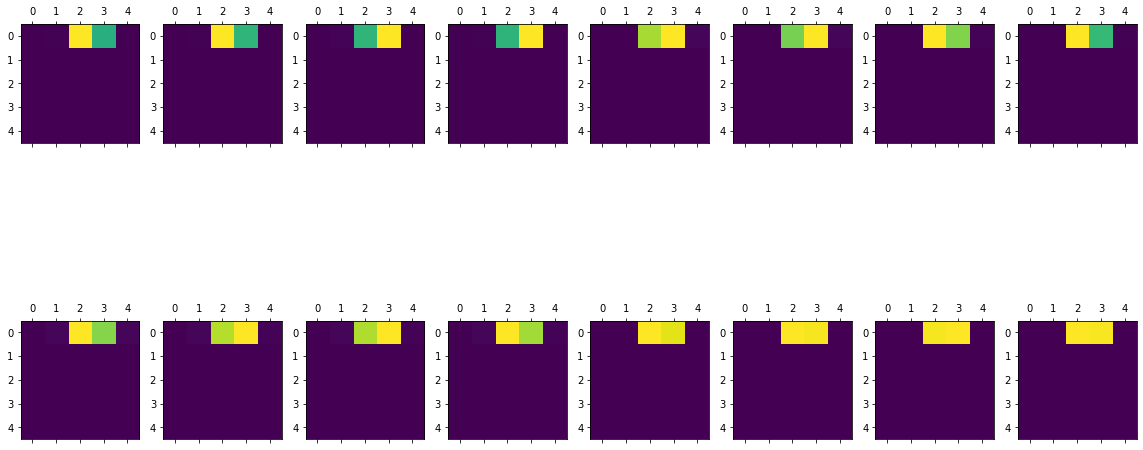

In [32]:
layers = 2
model.eval()
r, w = model(input[[1]])
fig, ax = plt.subplots(2,8, figsize=(20,10))


for i in range(8):
    r, w = model(input[[i]])
    a = w[0][0,0].detach().numpy()
    a[1:]=0
    ax[0][i].matshow(a)

for i in range(8,16):
    r, w = model(input[[i]])
    a = w[0][0,0].detach().numpy()
    a[1:]=0
    ax[1][i-8].matshow(a)

In [33]:
def plot_graph(i):
# i is the index of input want to plot
    import numpy as np
    import networkx as nx
    import matplotlib.pyplot as plt

    fig,ax = plt.subplots(1,2, figsize=(10,5))

    r, w = model(input[[i]])
    A = w[0][0,0].detach().numpy()
    A[1:] = 0
    temp = nx.MultiGraph()
    G = nx.from_numpy_matrix(A, create_using=temp)
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
    pos = {0:(0,0), 1:(-1,1),2:(1,1),3:(-1,-1), 4:(1,-1)}
    ax[0].matshow(input[[i]][0,0].numpy())
    nx.draw(G, pos, with_labels = True, edge_color=weights, edge_cmap=plt.cm.Greys, ax=ax[1])

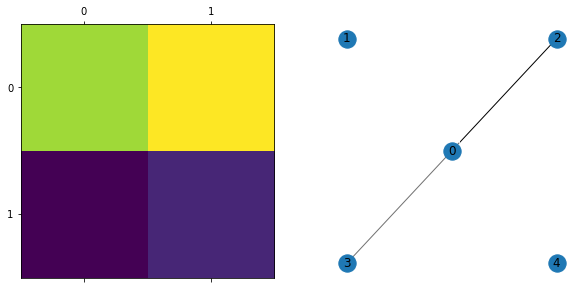

In [34]:
plot_graph(0)

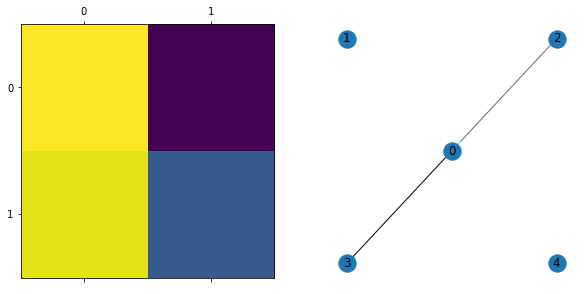

In [35]:
plot_graph(2)

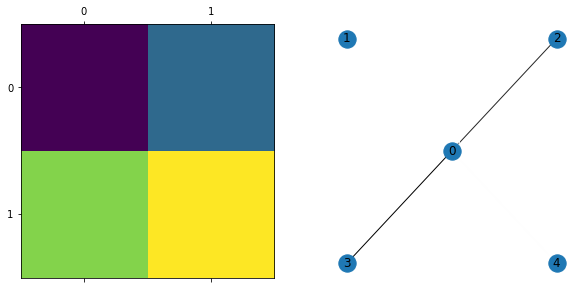

In [36]:
plot_graph(4)

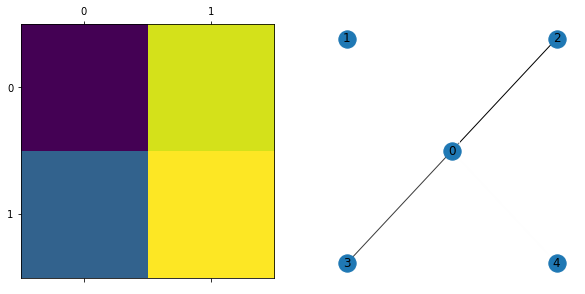

In [37]:
plot_graph(6)

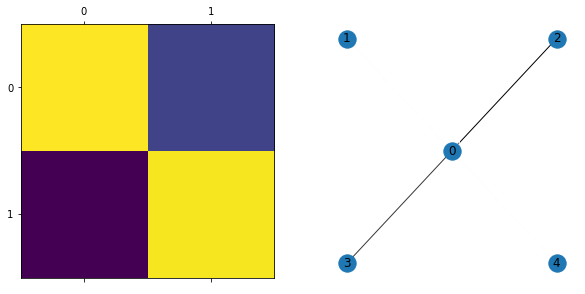

In [38]:
plot_graph(8)

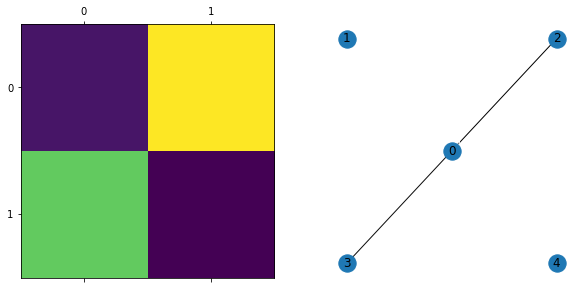

In [39]:
plot_graph(12)